# Projeto 3 -  Clusterização

## Informações do Projeto
DataSet:<br /><br />https://www.kaggle.com/new-york-city/nyc-property-sales
     nyc-property-sales

Grupo:
      Antonio Andraues<br />
      Lucca Delchiaro <br/ >
      Joao Edvirges.<br /><br />


In [67]:
import math
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import numpy as np
from sklearn.mixture import GMM
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [68]:
dados=pd.read_csv("nyc-rolling-sales.csv")
dados


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


    A partir do dataset escolhido, a equipe percebeu que há questões de sensibilidades em relação aos algoritmos disponíveis. Partindo do princípio de que o dataset está possui informações de boa qualidade, achou-se melhor optar dentre DBSCAN, K-Means e Mean Shift, o algoritmo Mean Shift por ter mais afinidade as nossas váriaveis.(doc:http://scikit-learn.org/stable/modules/clustering.html). Numa rápida lida no data base, viu-se a necessidade de definir quais regiões possuem high budget e low budget. Para isso, um elemento necessário e identificar para qual centróide cada ponto está convergindo, dando uma idéia de agrupamento e assim definindo cada bairro com sua income.Porém para esse cluster ficar apresentável, sabe-se que um processo de smoothing será necessário, pois mesmo dentro de divisões via renda, ainda assim dentro de uma classe, possui-se diferenças grandes nas rendas e nas depesas.Por isso a escolha do mean shift, que vai pegar cada ponto convergindo e dar uma suavizada nesse resultados, mostrando mais definido cada região.(Doc:https://www.youtube.com/watch?v=yTsslXB5v1s,https://www.youtube.com/watch?v=yhz8Fm0ymm8)
   O mean shift e utilizado em suavização de pixels, diminuindo as diferenças que cada cor possui, tornando a imagem de saída menos discrepante. 
   
   Segue o exemplo de um cluster via Mean Shift:
  http://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html
  
  A biblioteca que a equipe vai importar e a própria do scikit learn.

In [105]:
dados2=dados.loc[:,['NEIGHBORHOOD','SALE PRICE','BLOCK','TAX CLASS AT PRESENT','GROSS SQUARE FEET','LAND SQUARE FEET','YEAR BUILT']] #selecionando os subsets que vamos trabalhar
dados2=dados2.rename(columns={'SALE PRICE': 'SALE_PRICE'})#facilitar a representacao da coluna
dados2=dados2.rename(columns={'TAX CLASS AT PRESENT': 'TAX_CLASS_AT_PRESENT'})
dados2=dados2.rename(columns={'GROSS SQUARE FEET': 'GROSS_SQUARE_FEET'})
dados2=dados2.rename(columns={'LAND SQUARE FEET': 'LAND_SQUARE'})
dados2=dados2.rename(columns={'YEAR BUILT': 'YEAR_BUILT'})
dados2.SALE_PRICE[2] #Formato do preco nao completado
dados2=dados2.loc[dados2.SALE_PRICE!=' -  ']
dados2=dados2.loc[dados2.GROSS_SQUARE_FEET!=' -  ']#retirada do formato "Nao completado"
dados2=dados2.loc[dados2.LAND_SQUARE!=' -  ']
dados2.SALE_PRICE=dados2.SALE_PRICE.astype("float")
dados2.GROSS_SQUARE_FEET=dados2.GROSS_SQUARE_FEET.astype("float")
dados2.LAND_SQUARE=dados2.LAND_SQUARE.astype("float")
dados2.YEAR_BUILT=dados2.YEAR_BUILT.astype("int")
dados2=dados2.loc[dados2.TAX_CLASS_AT_PRESENT!='3'] #retirando fabricas e terrenos
dados2=dados2.loc[dados2.TAX_CLASS_AT_PRESENT!='4']
dados2.SALE_PRICE=dados2.SALE_PRICE  #preco por metro quadrado
dados2.SALE_PRICE=dados2.SALE_PRICE.loc[dados2.SALE_PRICE>=1]#filtrando casa abaixo do valor de 10milhoes de dollares
dados2.SALE_PRICE=dados2.SALE_PRICE.loc[dados2.SALE_PRICE<=10000000]
dados2=dados2.loc[dados2.GROSS_SQUARE_FEET<=10000]#outliers
dados2=dados2.loc[dados2.GROSS_SQUARE_FEET>0]#NO SENSE
dados2=dados2.loc[dados2.LAND_SQUARE<=20000]#outliers
dados2=dados2.loc[dados2.YEAR_BUILT>0]#NO SENSE
dados2=dados2.dropna()

In [106]:
n=3 #numeros de bairros
bairros = dados2.NEIGHBORHOOD[~dados2.NEIGHBORHOOD.duplicated(keep='first')] #Nomes de todos os bairros uma unica vez
primeirosB=bairros[:n] #primeiros 10 bairros para analize
primeirosBairros=[] #colocando os nomes em uma lista
for i in primeirosB:
    primeirosBairros.append(i)
        
Precos=[]         #pegando os precos para cada bairro
for u in primeirosBairros:  
    ppp=dados2.loc[dados2.NEIGHBORHOOD==u]
    pp=ppp  #Serve para analizar cada bairro individualmente
    for c in range(0,len(ppp)):
        preco=ppp.SALE_PRICE
    Precos.append(preco)
# dados2.plot.scatter(x='LAND_SQUARE_FEET',y='BLOCK',z='SALE_PRICE',norm=1)

# dd=pd.DataFrame(Precos,columns=[primeirosBairros]) #Gerado randomicamente so para teste    

# Plot
# fig, ax = plt.subplots()
# ax.legend()

# plt.show()

# dd=pd.DataFrame(np.random.rand(len(preco), n),columns=[primeirosBairros]) #Gerado randomicamente so para teste
# print(dd.max())

# ax = dd.plot.scatter(x=primeirosBairros[0], y=primeirosBairros[0], color='DarkBlue', label=primeirosBairros[0]);
# dd.plot.scatter(x=primeirosBairros[1], y=primeirosBairros[1], color='DarkGreen', label=primeirosBairros[1], ax=ax);

# plt.show()



In [107]:
# for i in bairros:
df

,X,Y,Z
0,6440.0,392,6625000.0
3,6794.0,402,3936272.0
4,4615.0,404,8000000.0
6,4226.0,406,3192840.0
172,3360.0,391,3300000.0
173,5608.0,393,7215000.0
174,3713.0,394,4750000.0
206,3855.0,771,7425000.0
207,5653.0,772,10.0
208,5653.0,772,10.0


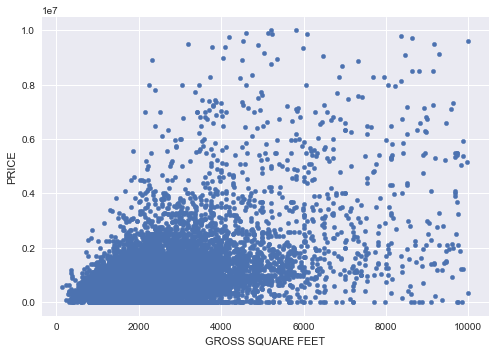

In [118]:
df4 = pd.DataFrame()
df4['GROSS SQUARE FEET'] = dados2.GROSS_SQUARE_FEET
df4['PRICE'] = dados2.SALE_PRICE
df4.plot.scatter(x='GROSS SQUARE FEET',y='PRICE')
# df3.plot.set_xlabel('Year Built')
# df3.plot.set_ylabel('Price')
plt.show()

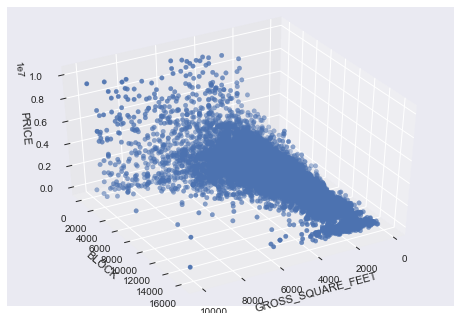

In [115]:
df = pd.DataFrame()
@interact(rodar_em_x = (0, 360, 20),rodar_em_y = (0, 360, 20))
def f(rodar_em_x=40,rodar_em_y=60):
    df['X'] = dados2.GROSS_SQUARE_FEET
    df['Y'] = dados2.BLOCK
    df['Z'] = dados2.SALE_PRICE
    threedee = plt.figure().gca(projection='3d')
    threedee.scatter(df.X, df.Y, df.Z)
    threedee.set_xlabel('GROSS_SQUARE_FEET')
    threedee.set_ylabel('BLOCK')
    threedee.set_zlabel('PRICE')
    threedee.view_init(rodar_em_x,rodar_em_y )
    plt.show()


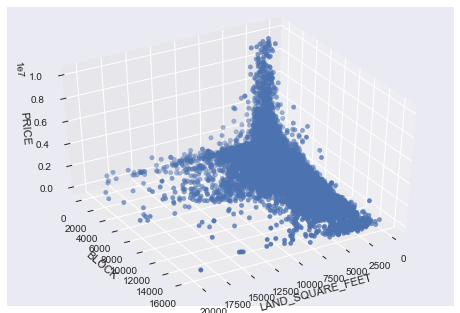

In [119]:
df2 = pd.DataFrame()
@interact(rodar_em_x = (0, 360, 20),rodar_em_y = (0, 360, 20))
def f(rodar_em_x=40,rodar_em_y=60):
    df2['X'] = dados2.LAND_SQUARE
    df2['Y'] = dados2.BLOCK
    df2['Z'] = dados2.SALE_PRICE
    threedee = plt.figure().gca(projection='3d')
    threedee.scatter(df2.X, df2.Y, df2.Z)
    threedee.set_xlabel('LAND_SQUARE_FEET')
    threedee.set_ylabel('BLOCK')
    threedee.set_zlabel('PRICE')
    threedee.view_init(rodar_em_x,rodar_em_y )
    plt.show()


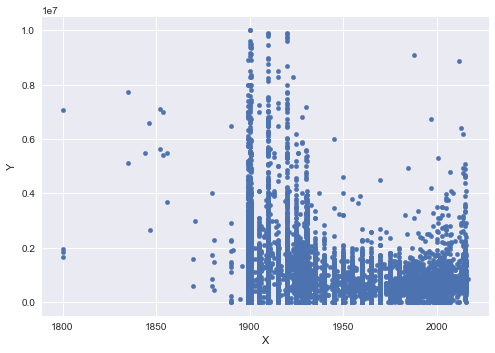

In [111]:
df3 = pd.DataFrame()
df3['X'] = dados2.YEAR_BUILT
df3['Y'] = dados2.SALE_PRICE
df3.plot.scatter(x='X',y='Y')
# df3.plot.set_xlabel('Year Built')
# df3.plot.set_ylabel('Price')
plt.show()

In [112]:
import numpy as np
import statsmodels.api as sm

X = df['Z']
Y = df[['Y','X']]
#X = sm.add_constant(X)
model = sm.OLS(X,Y)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                 2.332e+04
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:04:53   Log-Likelihood:            -4.0274e+05
No. Observations:               27131   AIC:                         8.055e+05
Df Residuals:                   27129   BIC:                         8.055e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Y            -14.4194      0.808    -17.856      0.000       -16.002   -12.837
X            402.8667      2.346    171.711      0.000       398.268   407.465
==============================================================================
Omnibus:                    21333.334   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           988393.806
Skew:                           3.406   Prob(JB):                         0.00
Kurtosis:                      31.774   Cond. No.                         4.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
X = df2['Z']
Y = df2[['Y','X']]
#X = sm.add_constant(X)
model = sm.OLS(X,Y)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     7964.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:04:53   Log-Likelihood:            -4.1005e+05
No. Observations:               27131   AIC:                         8.201e+05
Df Residuals:                   27129   BIC:                         8.201e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Y              7.8157      1.209      6.465      0.000         5.446    10.185
X            187.5269      2.439     76.875      0.000       182.746   192.308
==============================================================================
Omnibus:                    23629.654   Durbin-Watson:                   0.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           961170.373
Skew:                           4.080   Prob(JB):                         0.00
Kurtosis:                      30.994   Cond. No.                         3.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# # N = 5 #ESQUECER ESSA PARTE (SO TESTES)
# # arr = np.arange(N*2).reshape(N,2)
# # words=np.array(primeirosBairros)
# df = pd.DataFrame()
# df['X'] = dados2.LAND_SQUARE_FEET
# df['Y'] = dados2.BLOCK
# df['Z'] = dados2.SALE_PRICE
# Xuniques, X = np.unique(df['X'], return_inverse=True)
# Yuniques, Y = np.unique(df['Y'], return_inverse=True)

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1, projection='3d')
# ax.scatter(X, Y, Z, s=20, c='b')
# ax.set(xticks=range(len(Xuniques)), xticklabels=Xuniques,
#        yticks=range(len(Yuniques)), yticklabels=Yuniques) 
# plt.show()

In [12]:
# headers = pp #serve para analizar cada bairro individualmente depende do n
# headers.head()


In [33]:
# headers.head(5)

In [34]:
# headers.plot.scatter(x="SALE_PRICE",y="BLOCK")

In [35]:
# #E ISSO

# #Ta dando problema com o sale price......

# headers.plot.scatter(x="BLOCK",y="SALE_PRICE")